___
<h1> Machine Learning </h1>
<h2> M. Sc. in Electrical and Computer Engineering </h2>
<h3> Instituto Superior de Engenharia / Universidade do Algarve </h3>

[MEEC](https://ise.ualg.pt/en/curso/1477) / [ISE](https://ise.ualg.pt) / [UAlg](https://www.ualg.pt)

Pedro J. S. Cardoso (pcardoso@ualg.pt)
___

# $k$-Nearest Neighbors (kNN): Classification - Breast Cancer

In [1]:
#!pip3 install mglearn

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier


import matplotlib.pyplot as plt
import mglearn.plots
# from mglearn.datasets import make_wave
import numpy as np

np.random.seed(1)


## Load data

Let us start by loading data

In [2]:
cancer = load_breast_cancer()
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [3]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [4]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

Let us split the data in training and test data
(https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, 
    cancer.target,
    stratify=cancer.target,
    shuffle=True
)
print(f"Train shape: {X_train.shape} \nTest shape: {X_test.shape}")

Train shape: (426, 30) 
Test shape: (143, 30)


# Train and test

Prepare and train the classifier
(https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

In [6]:
knc = KNeighborsClassifier(
    n_neighbors=3, 
    p=1 # Minkowski metric
).fit(X_train, y_train)

do prediction on the test data

In [7]:
predicted = knc.predict(X_test)
predicted

array([0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1])

which predictions were correct?

In [8]:
predicted == y_test

array([ True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True, False, False,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

We can check the models's accuracy (mean accuracy = (TP+TN)/n), meaning the model predicted the class correctly for x% of the samples in the test dataset.
(https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier.score)

In [9]:
knc.score(X_test, y_test)

0.9370629370629371

I.e., the accuracy (percentage of correctness, as already computed) is 

In [10]:
sum(predicted == y_test) / len(predicted)

0.9370629370629371

And the predicted probabilities are

In [11]:
knc.predict_proba(X_test)

array([[1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.66666667, 0.33333333],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.66666667, 0.33333333],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.

## Metrics

We can also run a full set of metrics

In [12]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, precision_score, recall_score,  confusion_matrix, classification_report

y_pred = predicted

In [13]:
accuracy_score(y_test, y_pred)

0.9370629370629371

In [14]:
f1_score(y_test, y_pred)

0.9513513513513514

In [15]:
confusion_matrix(y_test, y_pred)

array([[46,  7],
       [ 2, 88]])

In [16]:
precision_score(y_test, y_pred)

0.9263157894736842

In [17]:
recall_score(y_test, y_pred)

0.9777777777777777

In [18]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.87      0.91        53
           1       0.93      0.98      0.95        90

    accuracy                           0.94       143
   macro avg       0.94      0.92      0.93       143
weighted avg       0.94      0.94      0.94       143


# Plot some projections
We can also do some plots, but this data as more than 2 dimensions... lets plot some projections 

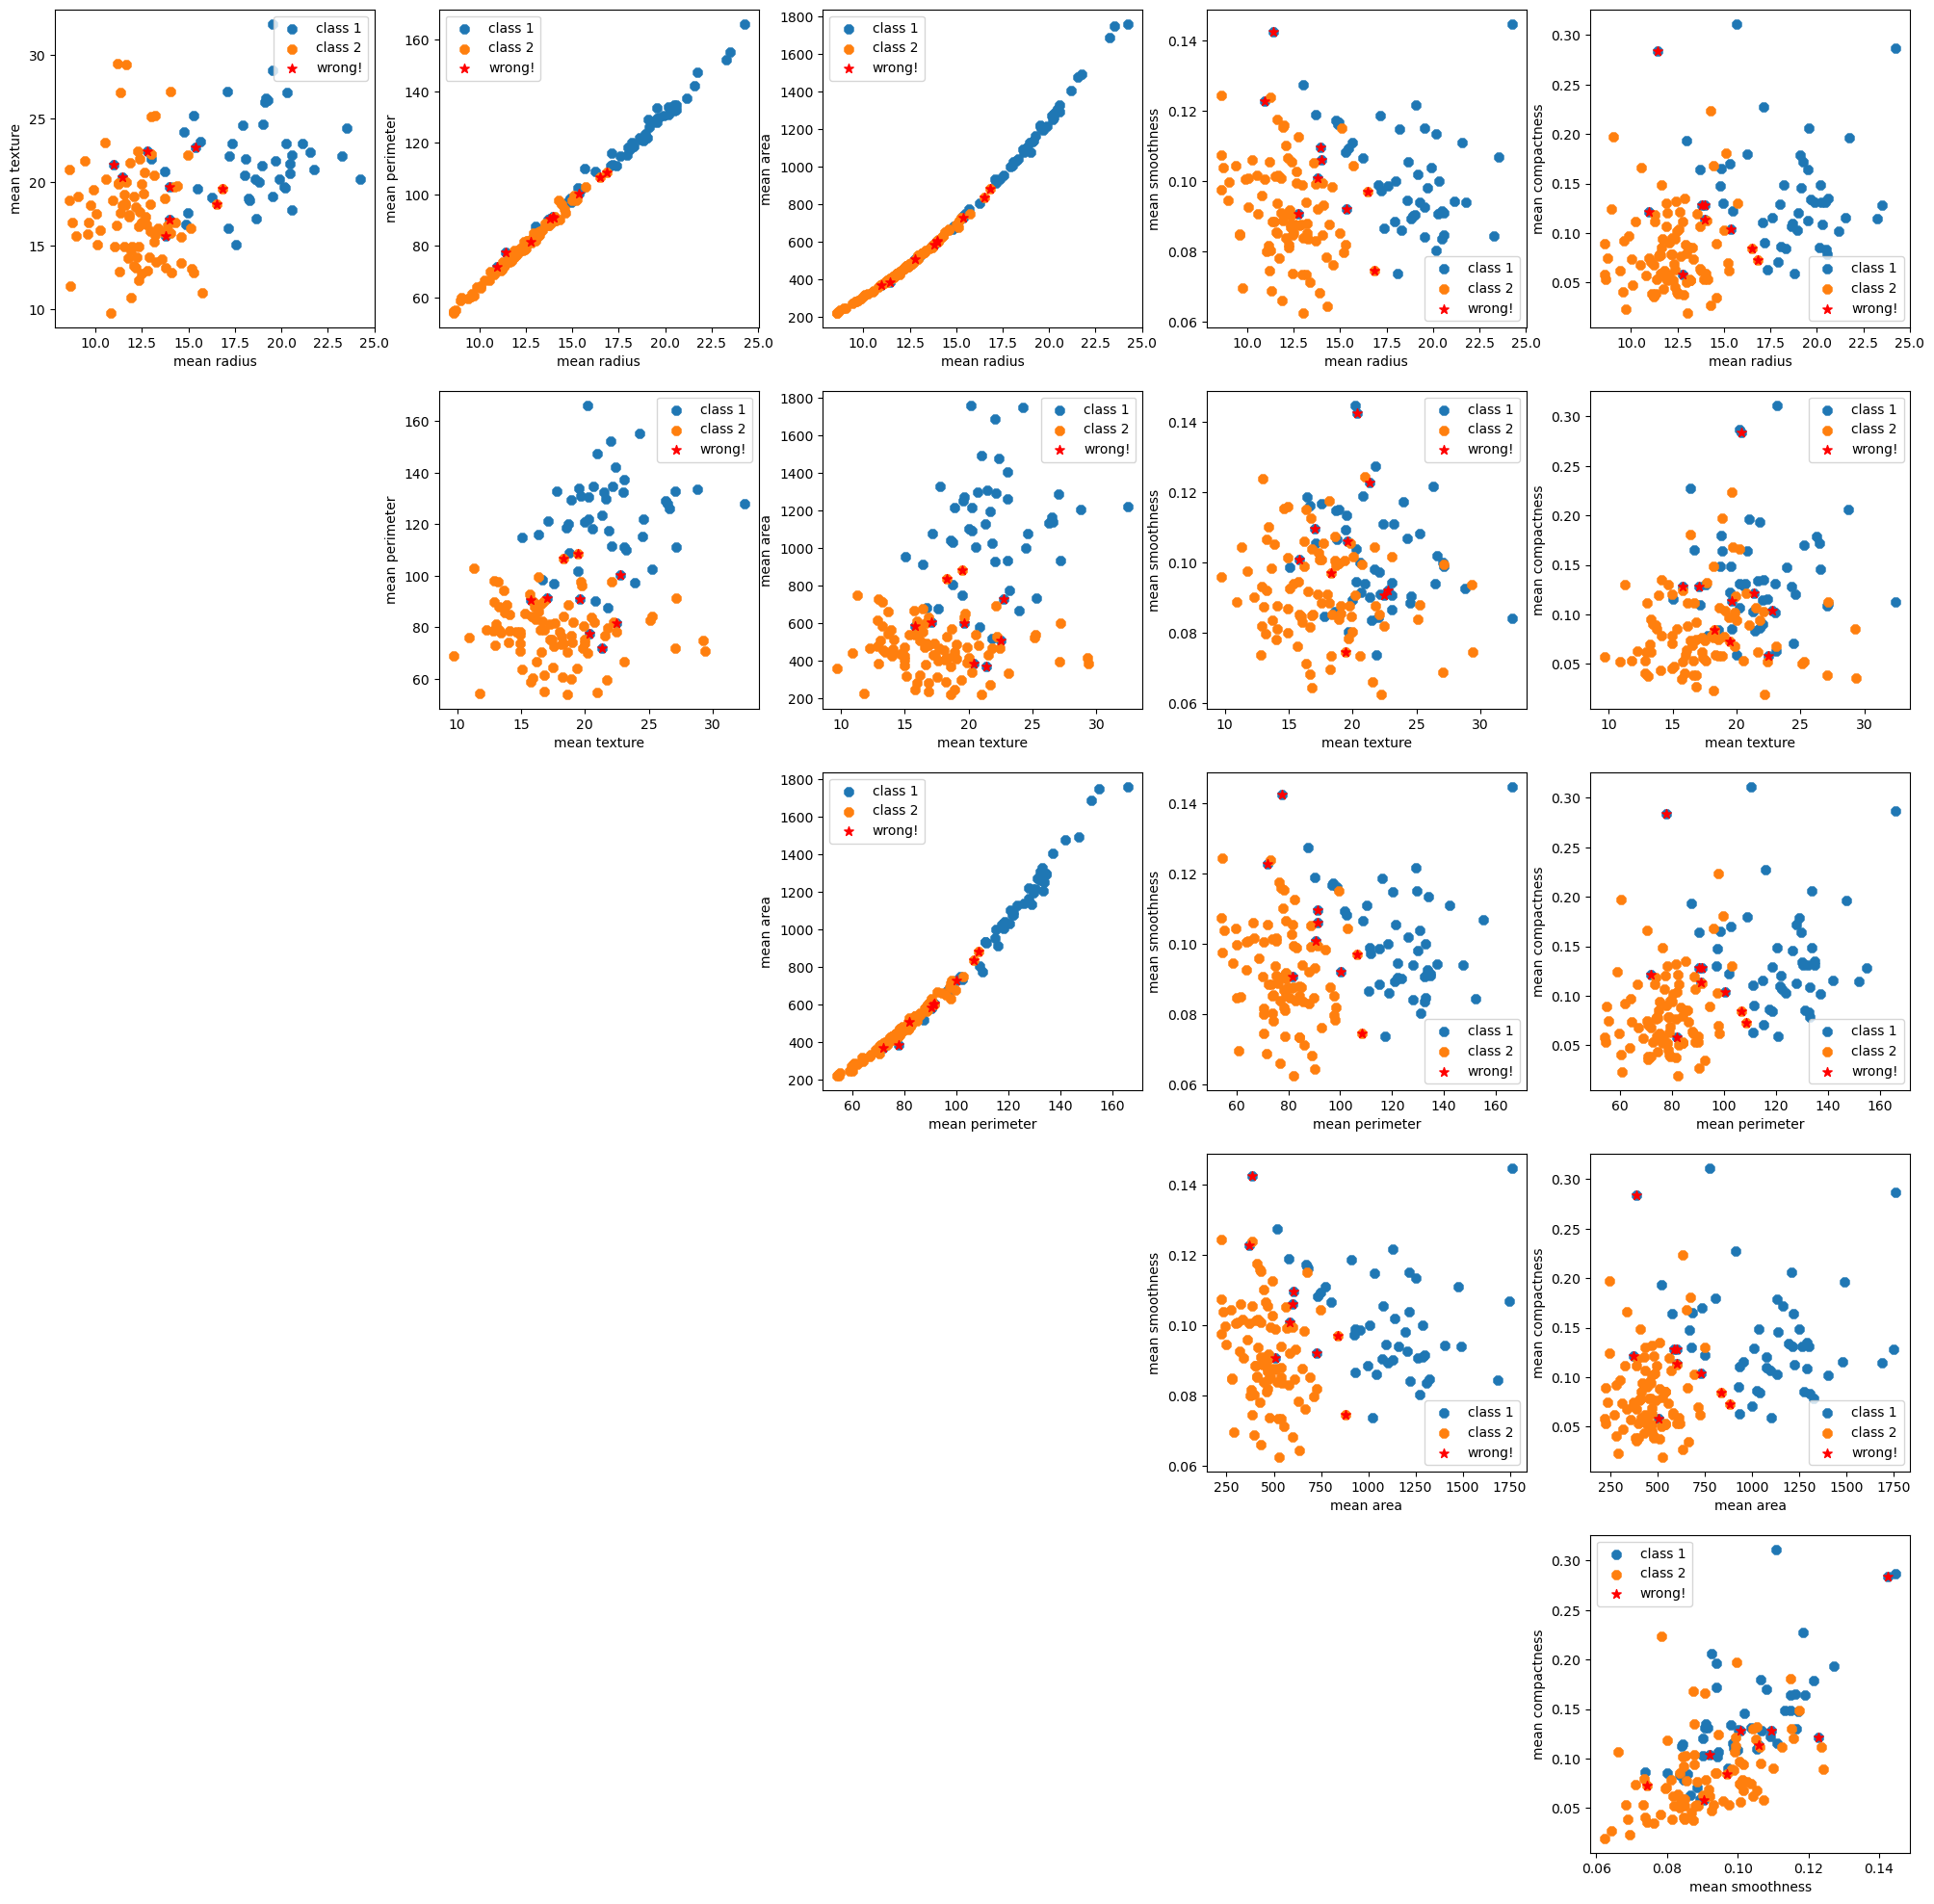

In [19]:
fig = plt.figure(figsize=(30, 30))

n_components = 6

for i in range(n_components):
    for j in range(n_components):
        if i < j: 
            # get an "ax"
            ax = fig.add_subplot(n_components, n_components, (i * n_components) + j + 1) 
            
            # get the indeces of the 'malignant' / 'benign'
            idx_cl_1 = (y_test == 0).nonzero()
            idx_cl_2 = (y_test == 1).nonzero()
            
            # see which ones where correctly predicted
            idx_falses = (~(y_test == predicted)).nonzero()
            
            # and do the plot on the ax
            ax.scatter(X_test[idx_cl_1, i], X_test[idx_cl_1, j], marker='8', s=50, label='class 1')
            ax.scatter(X_test[idx_cl_2, i], X_test[idx_cl_2, j], marker='8', s=50, label='class 2')
            ax.scatter(X_test[idx_falses, i], X_test[idx_falses, j], marker='*', s=50, c='r', label='wrong!')
            ax.legend()
            ax.set_xlabel(cancer.feature_names[i])
            ax.set_ylabel(cancer.feature_names[j])
        
            # ax.legend()
plt.show()

# Knn analysis using part of the features

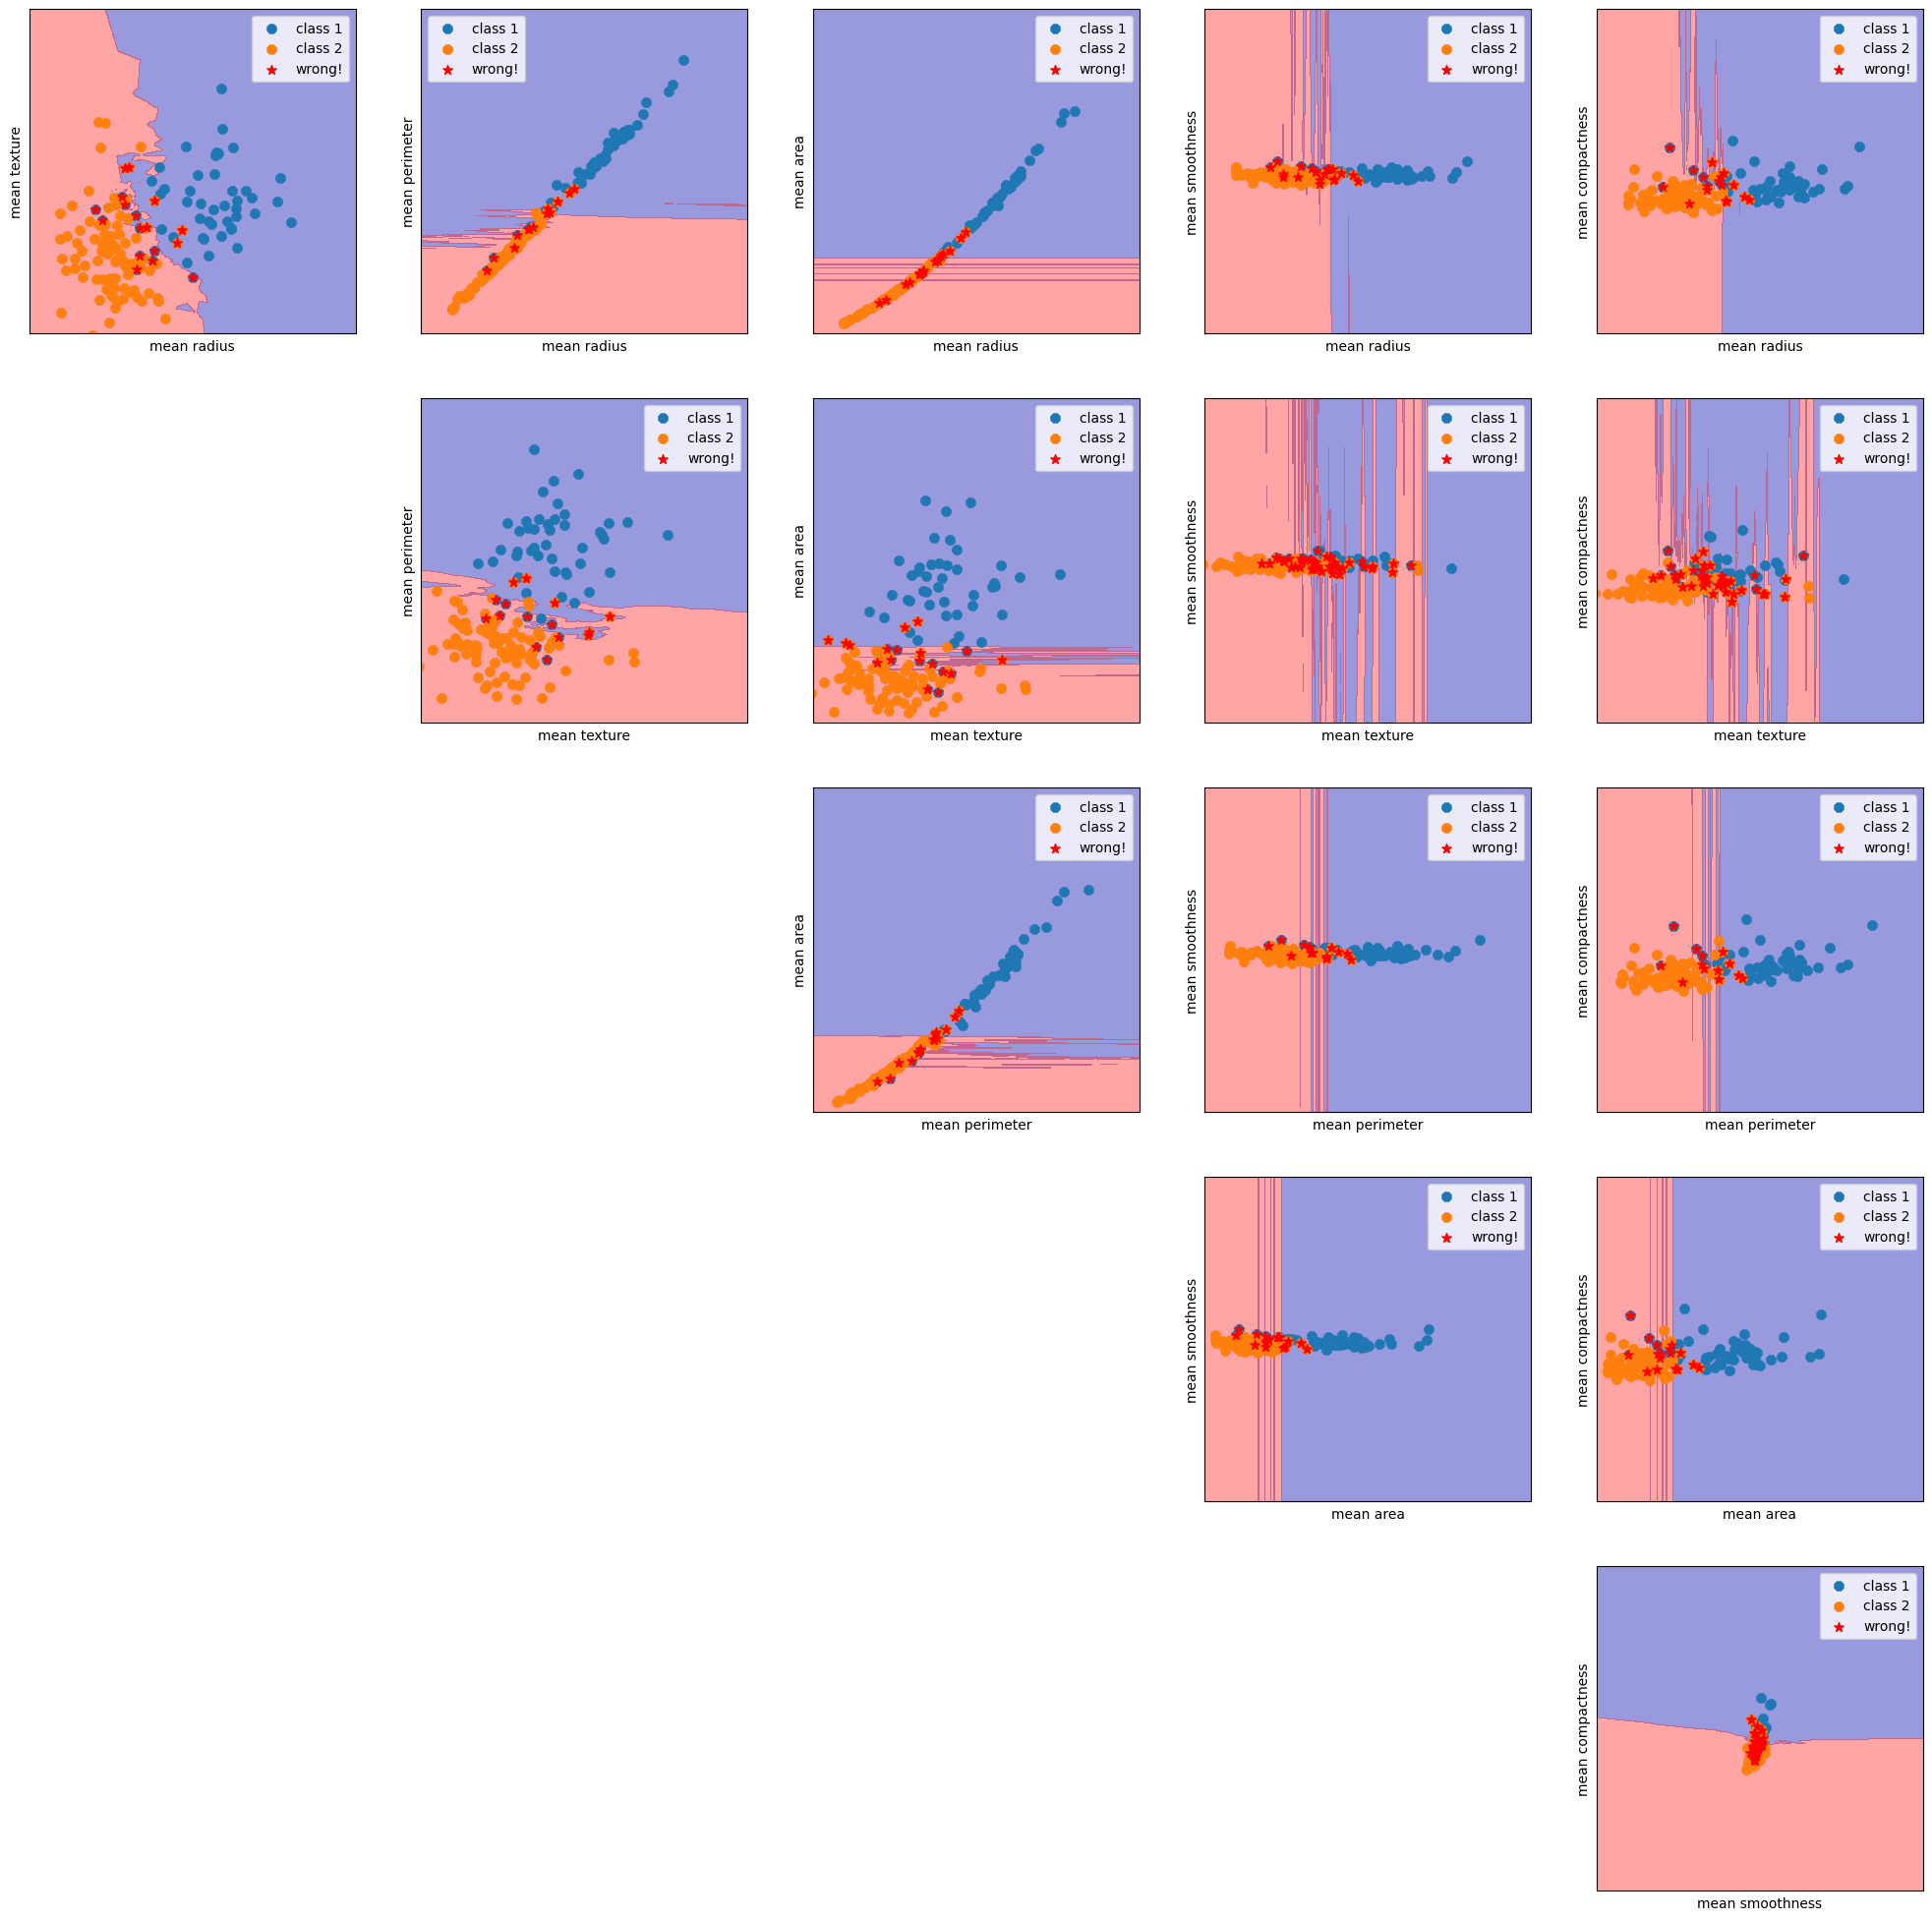

In [20]:
n_components = 6

fig = plt.figure(figsize=(30, 30))

for i in range(n_components):
    for j in range(n_components):
        if i < j: 
            # get an ax
            ax = fig.add_subplot(n_components, n_components, (i * n_components) + j + 1) 
            
            # get i and j features
            partial_x_train = X_train[:, (i, j)]
            
            # train a knn model with those features, k=5
            knc = KNeighborsClassifier(n_neighbors=5).fit(partial_x_train, y_train)
            
            # plot "knn separator", using the (parcial) train data
            mglearn.plots.plot_2d_separator(knc, partial_x_train, fill=True, eps=0.5, alpha=.4)

            # predict unseen data
            predicted = knc.predict(X_test[:, (i,j)])
            
            # and now do predictions and plots for the test data
            ## get indices for 'malignant' / 'benign' / wrongly predicted
            idx_cl_1 = (y_test==0).nonzero()
            idx_cl_2 = (y_test==1).nonzero()
            idx_falses = (~(y_test==predicted)).nonzero()

            ax.scatter(X_test[idx_cl_1, i], X_test[idx_cl_1, j], marker='8', s=50, label='class 1')
            ax.scatter(X_test[idx_cl_2, i], X_test[idx_cl_2, j], marker='8', s=50, label='class 2')
            ax.scatter(X_test[idx_falses, i], X_test[idx_falses, j], marker='*', s=50, c='r', label='wrong!')
            
            ax.legend()
            ax.set_xlabel(cancer.feature_names[i])
            ax.set_ylabel(cancer.feature_names[j])

        # ax.legend()
plt.show()


# Test the number of neighbors effect 

Let’s investigate whether we can confirm the connection between model complexity and generalization that we discussed above.
We will do this on the real world breast cancer dataset.
We begin by splitting the dataset into a training and a test set. Then we will evaluate training and test set performance with different numbers of neighbors.

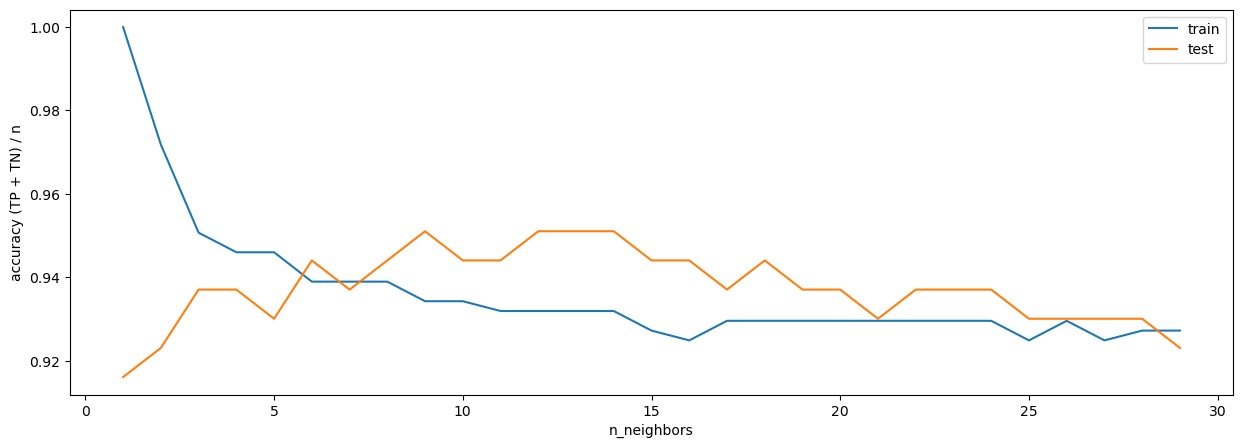

In [21]:
scores_train = []
scores_test = []

list_ks = range(1, 30)

#compute the train and test scores
for k in list_ks:
    knc = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
    scores_train.append(knc.score(X_train, y_train))
    scores_test.append(knc.score(X_test, y_test))
    
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111)
ax.plot(list_ks, scores_train, label='train')
ax.plot(list_ks, scores_test, label='test')
ax.legend()
plt.ylabel('accuracy (TP + TN) / n')
plt.xlabel('n_neighbors')

plt.show()